# Projet Turnovers

## Import des librairies

In [475]:
#Import

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from scikitplot.metrics import plot_cumulative_gain
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier

pd.set_option('display.max_columns',False)

import warnings
warnings.filterwarnings("ignore")

## Import de notre dataset 

In [435]:
turnover_df = pd.read_csv('depart_employes.csv',sep=';',header=0)
turnover_df.head(10)


,Satisfaction,derniere_evaluation,Nombre_de_projets,Nombre_heures_mensuelles_moyenne,Temps_passe_dans_entreprise,Accident_du travail,depart,promotion_5_dernieres_annees,Service,niveau_salaire
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# Exploration des données

## Informations sur nos données

In [436]:

turnover_df=turnover_df.rename(columns={"accident_du travail": "accident_du_travail"})
turnover_df.columns=turnover_df.columns.str.lower()

In [437]:


turnover_df=turnover_df.rename(columns={"accident_du travail": "accident_du_travail"})
turnover_df.columns=turnover_df.columns.str.lower() 

def info_df(df):
    df_info=pd.DataFrame(columns=['id','type','na_value','unique_value','value_1','value_2','value_3'])
    liste=[]
    for column in df:
        liste.append(column)
        liste.append(df[column].dtypes)
        liste.append(df[column].isnull().sum(axis=0))
        liste.append(len(df[column].value_counts()))
        liste.append(df[column].iloc[0])
        liste.append(df[column].iloc[1])
        liste.append(df[column].iloc[2])
        
        df_info.loc[len(df_info.index)]= liste
        liste=[]
        
    df_info.set_index('id',inplace=True)
    return df_info

display(info_df(turnover_df))





,type,na_value,unique_value,value_1,value_2,value_3
id,,,,,,
satisfaction,float64,0,92,0.38,0.8,0.11
derniere_evaluation,float64,0,65,0.53,0.86,0.88
nombre_de_projets,int64,0,6,2.0,5.0,7.0
nombre_heures_mensuelles_moyenne,int64,0,215,157.0,262.0,272.0
temps_passe_dans_entreprise,int64,0,8,3.0,6.0,4.0
accident_du_travail,int64,0,2,0.0,0.0,0.0
depart,int64,0,2,1.0,1.0,1.0
promotion_5_dernieres_annees,int64,0,2,0.0,0.0,0.0
service,object,0,10,sales,sales,sales


In [438]:
display(turnover_df.describe())

,satisfaction,derniere_evaluation,nombre_de_projets,nombre_heures_mensuelles_moyenne,temps_passe_dans_entreprise,accident_du_travail,depart,promotion_5_dernieres_annees
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Détection de doublons

In [439]:
turnover_df.duplicated(keep="first").sum()

3008

In [440]:
turnover_df.drop_duplicates(inplace=True)

In [441]:
turnover_df['depart'].value_counts()

depart
0    10000
1     1991
Name: count, dtype: int64

## Moyenne des variables quantitatives en fonction du départ

In [442]:
columns_quanti=['satisfaction','derniere_evaluation','nombre_de_projets','nombre_heures_mensuelles_moyenne','temps_passe_dans_entreprise','depart']

df_quanti=turnover_df[columns_quanti]
# Calculer la moyenne des variables en fonction de la colonne 'depart'
moyennes = df_quanti.groupby('depart').mean()

display(moyennes)

,satisfaction,derniere_evaluation,nombre_de_projets,nombre_heures_mensuelles_moyenne,temps_passe_dans_entreprise
depart,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000
1,0.440271,0.721783,3.883476,208.16223,3.881467


## Graphiques d'exploration des données 

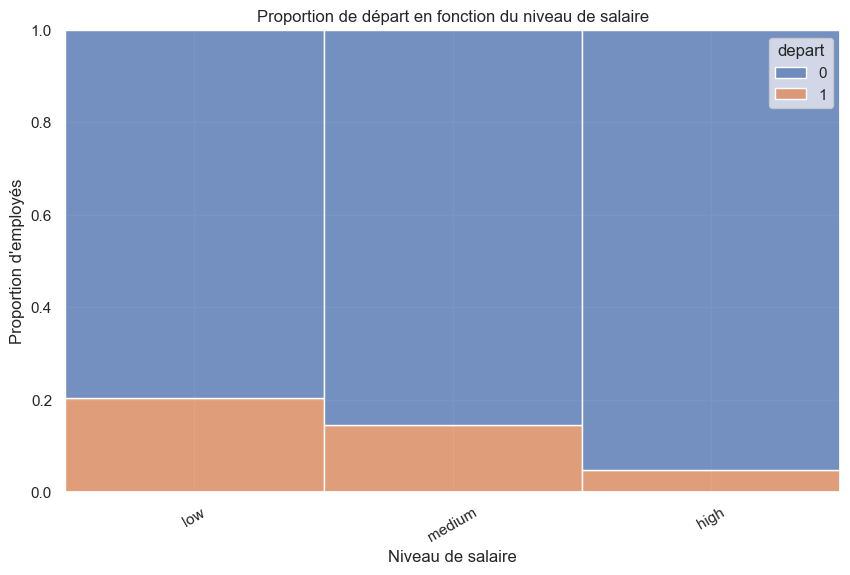

In [443]:
sns.set()

# Création du graphique avec seaborn 
plt.figure(figsize=(10, 6))  # Ajustement de la taille du graphique
sns.histplot(data=turnover_df, x="niveau_salaire", hue="depart", multiple="fill", stat="percent")
plt.xticks(rotation=30) 
plt.title("Proportion de départ en fonction du niveau de salaire")
plt.xlabel("Niveau de salaire") 
plt.ylabel("Proportion d'employés")   
plt.show()

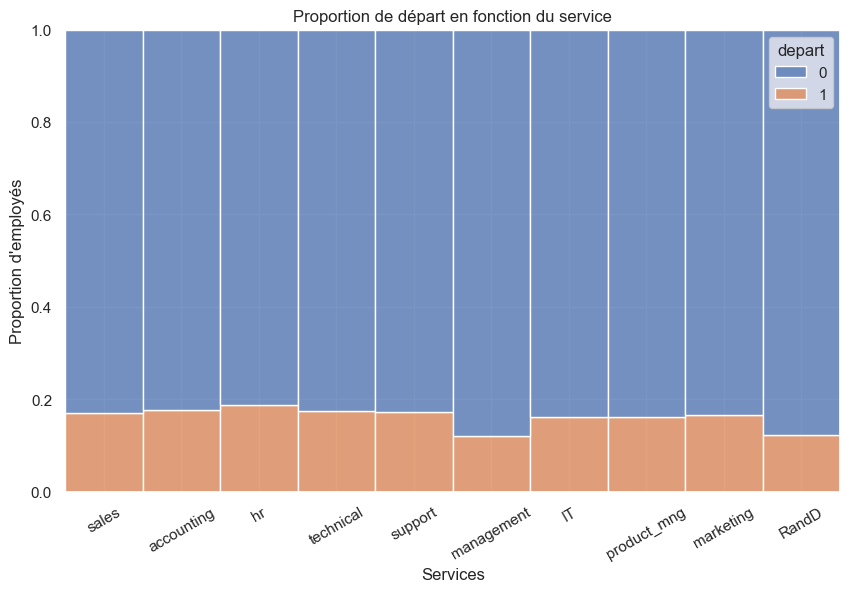

In [444]:
sns.set()

# Création du graphique avec seaborn 
plt.figure(figsize=(10, 6))  # Ajustement de la taille du graphique
sns.histplot(data=turnover_df, x="service", hue="depart", multiple="fill", stat="percent")
plt.xticks(rotation=30) 
plt.title("Proportion de départ en fonction du service")
plt.xlabel("Services") 
plt.ylabel("Proportion d'employés")   
plt.show()

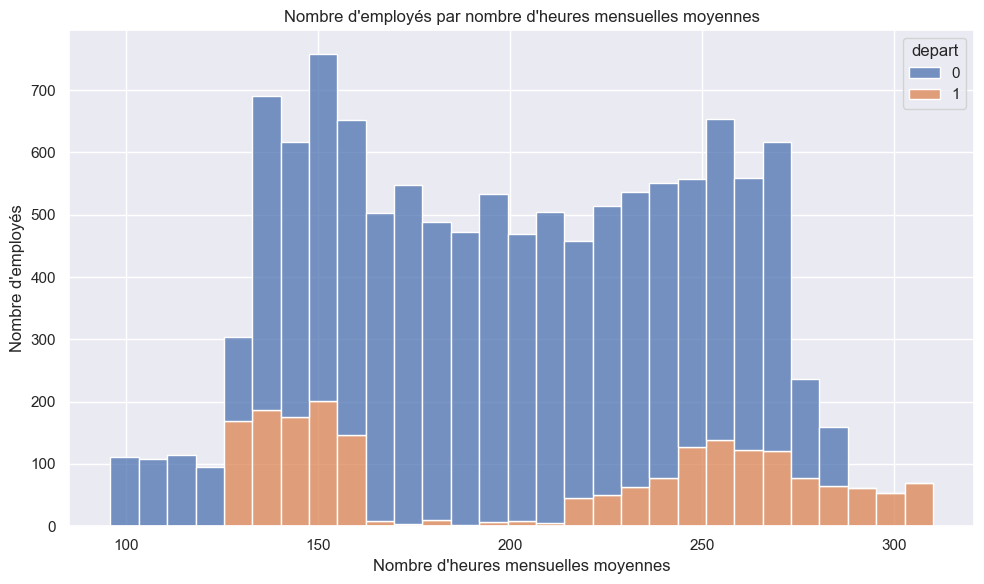

In [445]:
# Création du graphique avec seaborn 
plt.figure(figsize=(10, 6))
sns.histplot(data=turnover_df, x="nombre_heures_mensuelles_moyenne", hue="depart", multiple="stack", kde=False)
plt.title("Nombre d'employés par nombre d'heures mensuelles moyennes")
plt.xlabel("Nombre d'heures mensuelles moyennes") 
plt.ylabel("Nombre d'employés")  
plt.tight_layout()
plt.show()

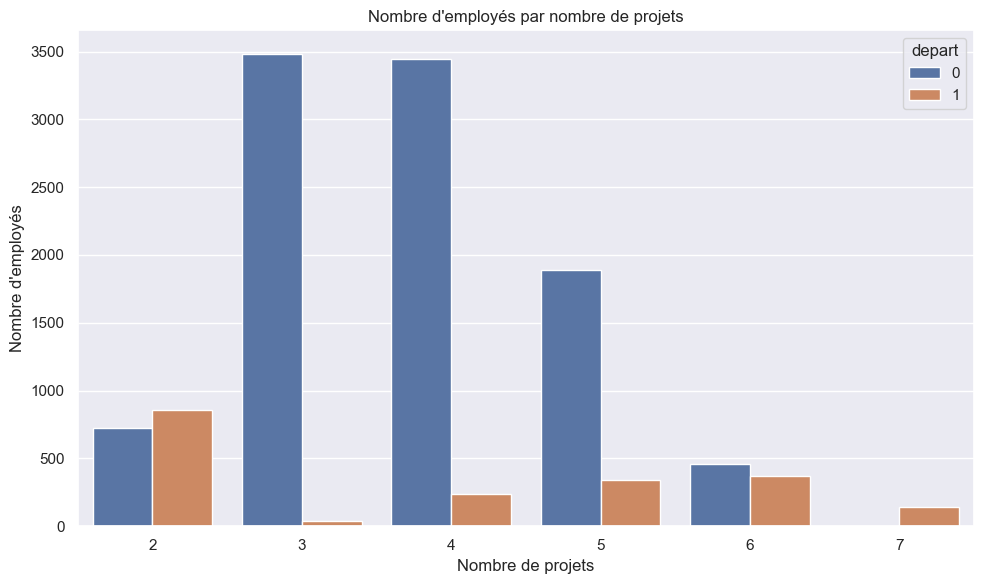

In [446]:
# Création du graphique avec seaborn e
plt.figure(figsize=(10, 6))
sns.countplot(data=turnover_df, x="nombre_de_projets", hue="depart")
plt.title("Nombre d'employés par nombre de projets")
plt.xlabel("Nombre de projets")
plt.ylabel("Nombre d'employés")
plt.tight_layout()
plt.show()

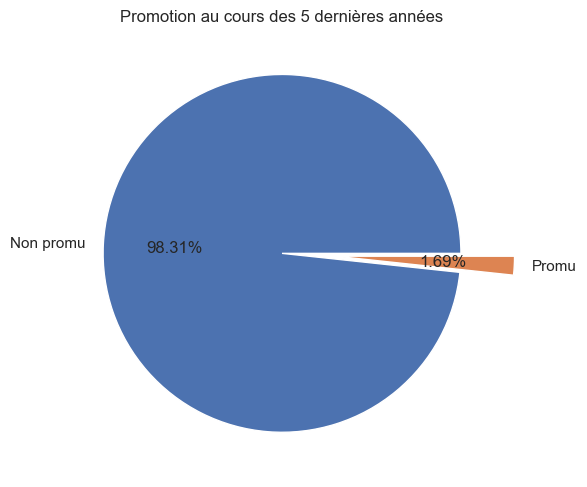

In [447]:
#Graphique circulaire sur la promotion au cours des 5 dernières années
labels = turnover_df["promotion_5_dernieres_annees"].value_counts().index.tolist()
labels = ["Promu" if i == 1 else "Non promu" for i in labels]


plt.figure(figsize=(6, 6))
plt.pie(x = turnover_df["promotion_5_dernieres_annees"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion au cours des 5 dernières années")
plt.tight_layout()
plt.show()

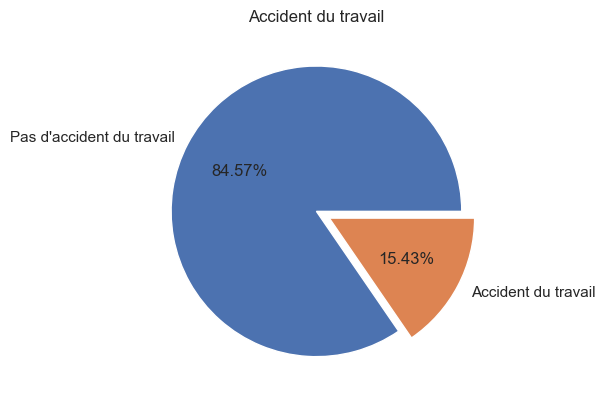

In [448]:
labels = turnover_df["accident_du_travail"].value_counts().index.tolist()
labels = ["Accident du travail" if i == 1 else "Pas d'accident du travail" for i in labels]

plt.figure(figsize=(6, 6))
plt.pie(x = turnover_df["accident_du_travail"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1])
plt.title("Accident du travail")
plt.tight_layout()
plt.show()

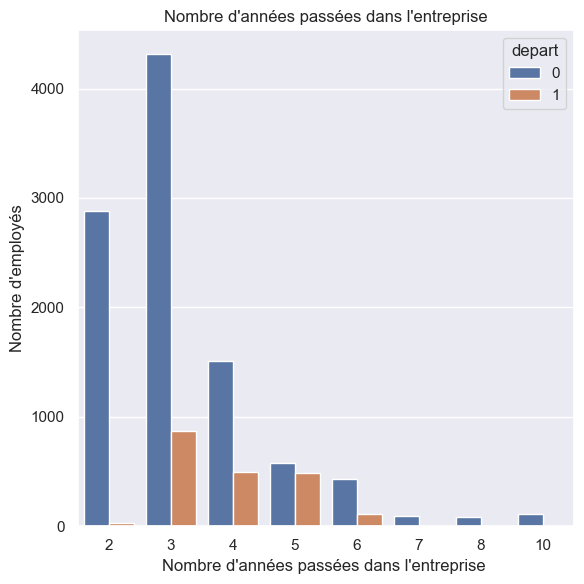

In [449]:
labels = turnover_df["temps_passe_dans_entreprise"].value_counts().index.tolist()

plt.figure(figsize=(6, 6))
sns.countplot(x = "temps_passe_dans_entreprise", data=turnover_df, hue="depart")
plt.title("Nombre d'années passées dans l'entreprise")
plt.xlabel("Nombre d'années passées dans l'entreprise ")  # Ajout de l'étiquette pour l'axe x
plt.ylabel("Nombre d'employés")
plt.tight_layout()
plt.show()

# Pre-processing

## Encodage des données quantitatives avec OrdinalEncoder

In [450]:
ord_enc = OrdinalEncoder()

turnover_df['service'] = ord_enc.fit_transform(turnover_df[['service']])
turnover_df['niveau_salaire'] = ord_enc.fit_transform(turnover_df[['niveau_salaire']])

In [451]:
data = turnover_df.drop(columns=['depart'])
target = turnover_df['depart']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [452]:
# Créer un classifieur Decision Tree
clf_tree = DecisionTreeClassifier(random_state=42)

param_grid_tree = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Créer un objet GridSearchCV
grid_search_tree = GridSearchCV(clf_tree, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)

# Effectuer la recherche sur grille
grid_search_tree.fit(x_train, y_train)

# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres :", grid_search_tree.best_params_)

# Utiliser les meilleurs paramètres pour créer un nouveau modèle
best_tree = grid_search_tree.best_estimator_
best_tree.fit(x_train, y_train)

# Évaluer la performance du modèle sur les données de test
print("Fiabilité decision tree sur ensemble d'entraînement : %0.3f" % best_tree.score(x_train, y_train))
print("Fiabilité decision tree sur ensemble de test : %0.3f" % best_tree.score(x_test, y_test))

Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20}
Fiabilité decision tree sur ensemble d'entraînement : 0.987
Fiabilité decision tree sur ensemble de test : 0.979


In [453]:
# Initialiser le modèle Random Forest
clf_RF = RandomForestClassifier(random_state=42)

param_grid_RF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialiser la recherche par grille avec une validation croisée à 5 plis
grid_search_RF = GridSearchCV(clf_RF, param_grid_RF, cv=5, scoring='accuracy', n_jobs=-1)

# Exécuter la recherche par grille sur les données d'entraînement
grid_search_RF.fit(x_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search_RF.best_params_)

# Entraîner le modèle avec les meilleurs hyperparamètres sur toutes les données d'entraînement
best_clf_RF = grid_search_RF.best_estimator_
best_clf_RF.fit(x_train, y_train)

# Évaluer la performance du modèle sur les données de test
print("Fiabilité random forest sur ensemble d'entraînement : %0.3f" % best_clf_RF.score(x_train, y_train))
print("Fiabilité random forest sur ensemble de test : %0.3f" % best_clf_RF.score(x_test, y_test))

Meilleurs hyperparamètres : {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Fiabilité random forest sur ensemble d'entraînement : 0.987
Fiabilité random forest sur ensemble de test : 0.980


In [454]:
clf_log_reg = LogisticRegression(random_state=42)
clf_log_reg.fit(x_train, y_train)

print("Fiabilité logistic regression sur ensemble d'entraînement : %0.3f" % clf_log_reg.score(x_train, y_train))
print("Fiabilité logistic regression sur ensemble de test : %0.3f" % clf_log_reg.score(x_test, y_test))

Fiabilité logistic regression sur ensemble d'entraînement : 0.835
Fiabilité logistic regression sur ensemble de test : 0.834


In [455]:
# Initialiser le modèle KNN
clf_knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [2, 5, 10, 20],
}

# Initialiser la recherche par grille avec une validation croisée à 5 plis
grid_search_knn = GridSearchCV(clf_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Exécuter la recherche par grille sur les données d'entraînement
grid_search_knn.fit(x_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search_knn.best_params_)

# Entraîner le modèle avec les meilleurs hyperparamètres sur toutes les données d'entraînement
best_clf_knn = grid_search_knn.best_estimator_
best_clf_knn.fit(x_train, y_train)

print("Régression logistique sur ensemble d'entraînement : %0.3f" % best_clf_knn.score(x_train, y_train))
print("Regression logistique sur ensemble de test : %0.3f" % best_clf_knn.score(x_test, y_test))

Meilleurs hyperparamètres : {'n_neighbors': 5}
Régression logistique sur ensemble d'entraînement : 0.955
Regression logistique sur ensemble de test : 0.940


In [456]:
clf_SVM = svm.SVC(gamma='scale', kernel='linear')
clf_SVM .fit(x_train, y_train)

print("Fiabilité SVM sur ensemble d'entraînement : %0.3f" % clf_SVM.score(x_train, y_train))
print("Fiabilité SVM sur ensemble de test : %0.3f" % clf_SVM.score(x_test, y_test))

Fiabilité SVM sur ensemble d'entraînement : 0.834
Fiabilité SVM sur ensemble de test : 0.833


In [457]:

clf_nn = Sequential()
clf_nn.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))  # Couche d'entrée avec 64 neurones
clf_nn.add(Dense(32, activation='relu'))  # Couche cachée avec 32 neurones
clf_nn.add(Dense(1, activation='sigmoid'))  # Couche de sortie binaire
 
# Compilation du modèle
clf_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Entraînement du modèle
clf_nn.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = clf_nn.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy:.3f}')

Epoch 1/10
120/120 [==============================] - 1s 3ms/step - loss: 0.5173 - accuracy: 0.8235 - val_loss: 0.4633 - val_accuracy: 0.8348
Epoch 2/10
120/120 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8340 - val_loss: 0.4358 - val_accuracy: 0.8348
Epoch 3/10
120/120 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.8281 - val_loss: 0.4495 - val_accuracy: 0.8317
Epoch 4/10
120/120 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8289 - val_loss: 0.6636 - val_accuracy: 0.8348
Epoch 5/10
120/120 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8272 - val_loss: 0.3985 - val_accuracy: 0.8338
Epoch 6/10
120/120 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8264 - val_loss: 0.3946 - val_accuracy: 0.8332
Epoch 7/10
120/120 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8284 - val_loss: 0.3898 - val_accuracy: 0.8332
Epoch 

In [462]:
# Prédire les données issues des différents classifiers
y_pred_tree = best_tree.predict(x_test)
y_pred_RF = best_clf_RF.predict(x_test)
y_pred_log_reg = clf_log_reg.predict(x_test)
y_pred_knn = best_clf_knn.predict(x_test)
y_pred_SVM = clf_SVM.predict(x_test)
y_pred_nn = np.round(clf_nn.predict(x_test).astype(int))

75/75 [==============================] - 0s 635us/step


In [460]:
# Calculer les rapports de classification pour chaque classificateur
classification_report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
classification_report_RF = classification_report(y_test, y_pred_RF, output_dict=True)
classification_report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)
classification_report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
classification_report_SVM = classification_report(y_test, y_pred_SVM, output_dict=True)
classification_report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

accuracy_train_tree = best_tree.score(x_train, y_train)
accuracy_train_RF = best_clf_RF.score(x_train, y_train)
accuracy_train_log_reg = clf_log_reg.score(x_train, y_train)
accuracy_train_knn = best_clf_knn.score(x_train, y_train)
accuracy_train_SVM = clf_SVM.score(x_train, y_train)

# Créer un DataFrame avec les métriques de train accuracy, rappel, précision et f1-score pour chaque classificateur
df_metrics = pd.DataFrame({
    'Decision Tree': classification_report_tree['weighted avg'],
    'Random Forest': classification_report_RF['weighted avg'],
    'Logistic Regression': classification_report_log_reg['weighted avg'],
    'KNN': classification_report_knn['weighted avg'],
    'SVM': classification_report_SVM['weighted avg'],
    'Neural Network': classification_report_nn['weighted avg']
})

# Suppression de la dernière ligne
df_metrics = df_metrics.drop(df_metrics.tail(1).index)

df_metrics.loc['Train Accuracy'] = [accuracy_train_tree, accuracy_train_RF, accuracy_train_log_reg, accuracy_train_knn, accuracy_train_SVM, accuracy]

df_metrics = df_metrics.reindex(['Train Accuracy', 'recall', 'precision', 'f1-score'])

df_metrics = df_metrics.round(3)
display(df_metrics)

,Decision Tree,Random Forest,Logistic Regression,KNN,SVM,Neural Network
Train Accuracy,0.987,0.987,0.835,0.955,0.834,0.825
recall,0.979,0.980,0.834,0.940,0.833,0.833
precision,0.979,0.980,0.797,0.942,0.694,0.694
f1-score,0.978,0.980,0.801,0.941,0.757,0.757


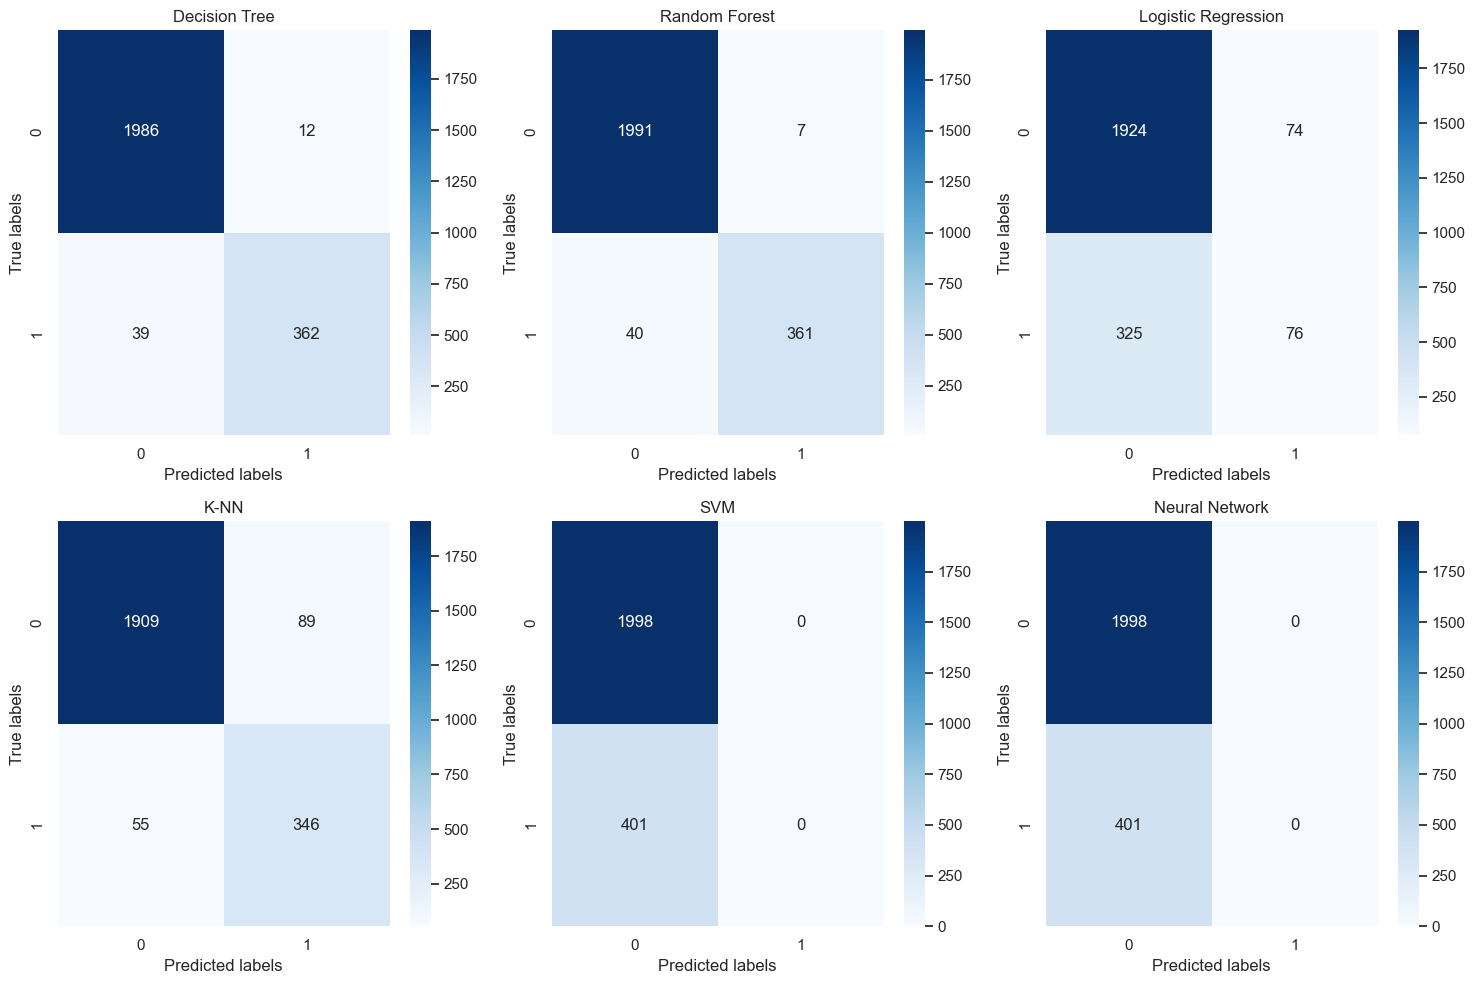

In [463]:
# Créer les matrices de confusion pour les prédictions
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'K-NN', 'SVM', "Neural Network"]
conf_matrices = [conf_matrix_tree, conf_matrix_RF, conf_matrix_log_reg, conf_matrix_knn, conf_matrix_SVM, conf_matrix_nn]

# Créer un sous-graphique avec plusieurs axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Parcourir chaque matrice de confusion et son nom de modèle associé
for ax, conf_matrix, model_name in zip(axes.flatten(), conf_matrices, model_names):
    # Utiliser seaborn pour afficher la matrice de confusion
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(model_name)  # Définir le titre du sous-graphique comme le nom du modèle
    ax.set_xlabel('Predicted labels')  # Définir le titre de l'axe x
    ax.set_ylabel('True labels')  # Définir le titre de l'axe y

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

plt.show()

In [464]:
# Prédire les données issues des différents classifiers
y_pred_proba_tree = best_tree.predict_proba(x_test)
y_pred_proba_RF = best_clf_RF.predict_proba(x_test)
y_pred_proba_log_reg = clf_log_reg.predict_proba(x_test)
y_pred_proba_knn = best_clf_knn.predict_proba(x_test)

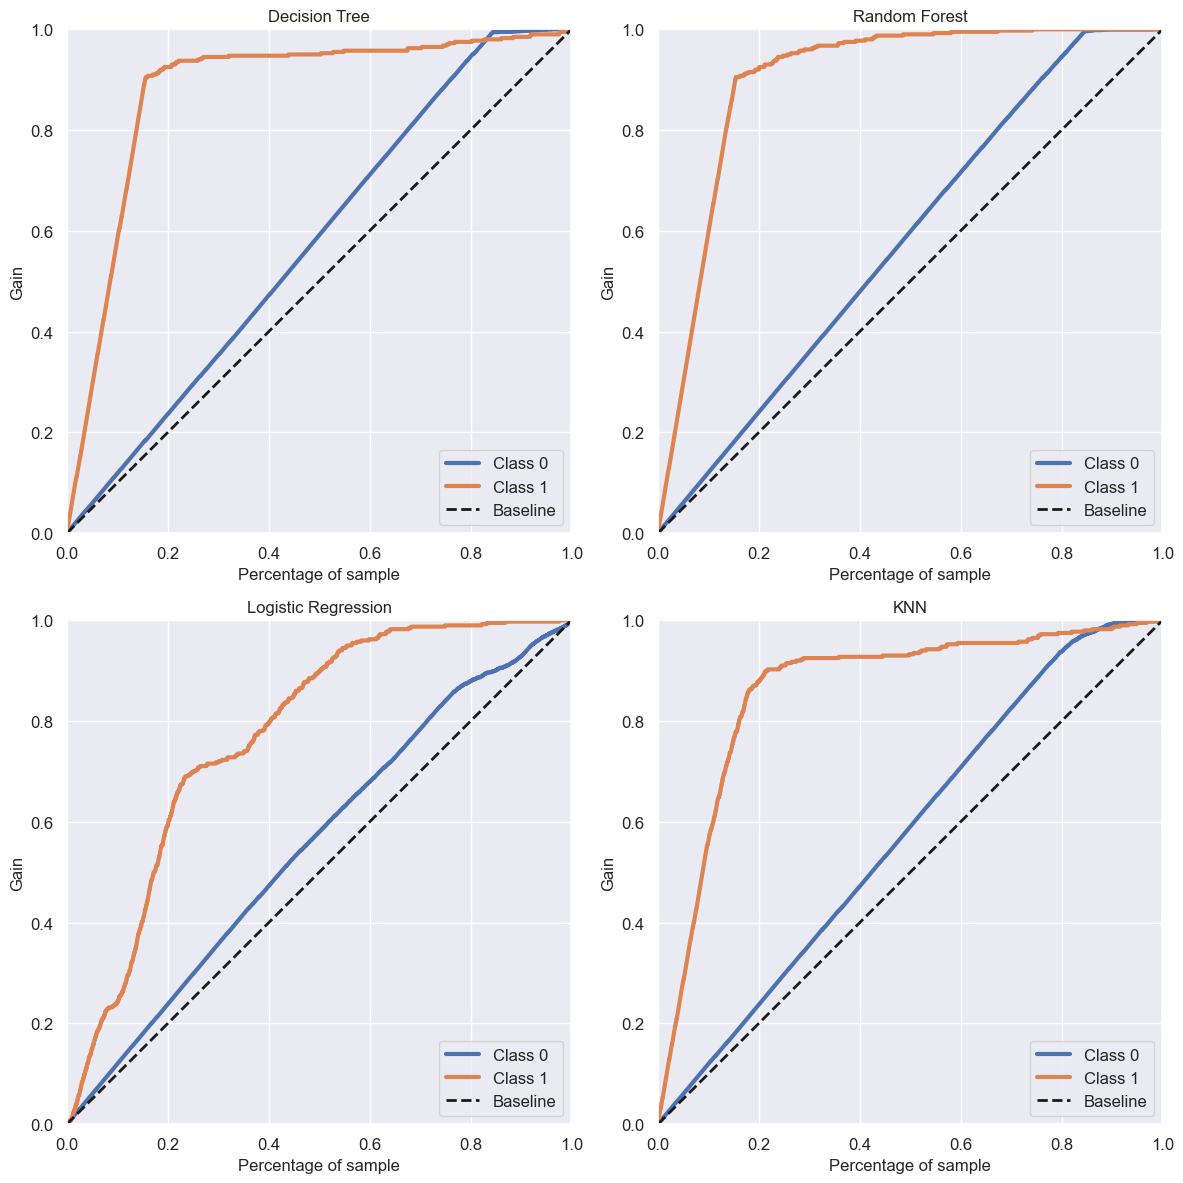

In [467]:
# Créer un sous-graphique avec plusieurs axes
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Tracer et afficher la courbe de gain cumulé pour le Decision Tree
plot_cumulative_gain_tree = plot_cumulative_gain(y_test, y_pred_proba_tree, ax=axes[0, 0])
axes[0, 0].set_title('Decision Tree')

# Tracer et afficher la courbe de gain cumulé pour le Random Forest
plot_cumulative_gain_RF = plot_cumulative_gain(y_test, y_pred_proba_RF, ax=axes[0, 1])
axes[0, 1].set_title('Random Forest')

# Tracer et afficher la courbe de gain cumulé pour la Logistic Regression
plot_cumulative_gain_log_reg = plot_cumulative_gain(y_test, y_pred_proba_log_reg, ax=axes[1, 0])
axes[1, 0].set_title('Logistic Regression')

# Tracer et afficher la courbe de gain cumulé pour le KNN
plot_cumulative_gain_knn = plot_cumulative_gain(y_test, y_pred_proba_knn, ax=axes[1, 1])
axes[1, 1].set_title('KNN')

# Ajuster automatiquement l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

## Encodage avec dichotomisation 

In [468]:
turnover_df = pd.read_csv("depart_employes.csv" , sep = ';', header = 0)

turnover_df_dum = pd.get_dummies(turnover_df, "Service")
turnover_df_dum = pd.get_dummies(turnover_df_dum, "niveau_salaire")

data_dum = turnover_df_dum.drop(columns=['depart'])
target_dum = turnover_df_dum['depart']

x_train_dum, x_test_dum, y_train_dum, y_test_dum = train_test_split(data_dum, target_dum, test_size=0.2, random_state=42)

clf_tree = DecisionTreeClassifier(random_state=42)
param_grid_tree = {
    'max_depth': [7],
    'min_samples_split': [10],
    'min_samples_leaf': [2],
    'criterion': ['gini']
}
grid_search_tree = GridSearchCV(clf_tree, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(x_train_dum, y_train_dum)
best_tree = grid_search_tree.best_estimator_
best_tree.fit(x_train_dum, y_train_dum)

clf_RF = RandomForestClassifier(random_state=42)
param_grid_RF = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}
grid_search_RF = GridSearchCV(clf_RF, param_grid_RF, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_RF.fit(x_train_dum, y_train_dum)
best_clf_RF = grid_search_RF.best_estimator_
best_clf_RF.fit(x_train_dum, y_train_dum)

clf_knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [2],
}
grid_search_knn = GridSearchCV(clf_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train_dum, y_train_dum)
best_clf_knn = grid_search_knn.best_estimator_
best_clf_knn.fit(x_train_dum, y_train_dum)

y_pred_tree_dum = best_tree.predict(x_test_dum)
y_pred_RF_dum = best_clf_RF.predict(x_test_dum)
y_pred_knn_dum = best_clf_knn.predict(x_test_dum)

classification_report_tree_dum = classification_report(y_test_dum, y_pred_tree_dum, output_dict=True)
classification_report_RF_dum = classification_report(y_test_dum, y_pred_RF_dum, output_dict=True)
classification_report_knn_dum = classification_report(y_test_dum, y_pred_knn_dum, output_dict=True)

accuracy_train_tree_dum = best_tree.score(x_train_dum, y_train_dum)
accuracy_train_RF_dum = best_clf_RF.score(x_train_dum, y_train_dum)
accuracy_train_knn_dum = best_clf_knn.score(x_train_dum, y_train_dum)

df_metrics_dum = pd.DataFrame({
    'Decision Tree': classification_report_tree_dum['weighted avg'],
    'Random Forest': classification_report_RF_dum['weighted avg'],
    'KNN': classification_report_knn_dum['weighted avg']
})

df_metrics_dum = df_metrics_dum.drop(df_metrics_dum.tail(1).index)

df_metrics_dum.loc['Train Accuracy'] = [accuracy_train_tree_dum, accuracy_train_RF_dum, accuracy_train_knn_dum]

df_metrics_dum = df_metrics_dum.reindex(['Train Accuracy', 'recall', 'precision', 'f1-score'])

df_metrics_dum = df_metrics_dum.round(3)
display(df_metrics_dum)

,Decision Tree,Random Forest,KNN
Train Accuracy,0.982,0.982,0.989
recall,0.976,0.978,0.949
precision,0.976,0.978,0.948
f1-score,0.975,0.978,0.948


## Avec dichotomisation

In [471]:
turnover_df = pd.read_csv("depart_employes.csv" , sep = ';', header = 0)

data = turnover_df.drop(columns=['depart'])
target = turnover_df['depart']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

scaler = StandardScaler()

col_names = x_train.columns
cat_val_names = ['Accident_du travail','promotion_5_dernieres_annees','Service','niveau_salaire']
num_val_names1 = [col for col in col_names if col not in cat_val_names]
new_col_names = num_val_names1 + cat_val_names

pipeline = ColumnTransformer([
    ('num_values', StandardScaler(), num_val_names1),
    ('cat_values', OrdinalEncoder(), cat_val_names)
], remainder='passthrough')

x_train_sca = pipeline.fit_transform(x_train)
x_test_sca = pipeline.transform(x_test)

clf_tree = DecisionTreeClassifier(random_state=42)
param_grid_tree = {
    'max_depth': [7],
    'min_samples_split': [10],
    'min_samples_leaf': [2],
    'criterion': ['gini']
}
grid_search_tree = GridSearchCV(clf_tree, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(x_train_sca, y_train)
best_tree = grid_search_tree.best_estimator_
best_tree.fit(x_train_sca, y_train)

clf_RF = RandomForestClassifier(random_state=42)
param_grid_RF = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}
grid_search_RF = GridSearchCV(clf_RF, param_grid_RF, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_RF.fit(x_train_sca, y_train)
best_clf_RF = grid_search_RF.best_estimator_
best_clf_RF.fit(x_train_sca, y_train)

clf_knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [2],
}
grid_search_knn = GridSearchCV(clf_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train_sca, y_train)
best_clf_knn = grid_search_knn.best_estimator_
best_clf_knn.fit(x_train_sca, y_train)

y_pred_tree_sca = best_tree.predict(x_test_sca)
y_pred_RF_sca = best_clf_RF.predict(x_test_sca)
y_pred_knn_sca = best_clf_knn.predict(x_test_sca)

classification_report_tree_sca = classification_report(y_test, y_pred_tree_sca, output_dict=True)
classification_report_RF_sca = classification_report(y_test, y_pred_RF_sca, output_dict=True)
classification_report_knn_sca = classification_report(y_test, y_pred_knn_sca, output_dict=True)

accuracy_train_tree_sca = best_tree.score(x_train_sca, y_train)
accuracy_train_RF_sca = best_clf_RF.score(x_train_sca, y_train)
accuracy_train_knn_sca = best_clf_knn.score(x_train_sca, y_train)

df_metrics_sca = pd.DataFrame({
    'Decision Tree': classification_report_tree_sca['weighted avg'],
    'Random Forest': classification_report_RF_sca['weighted avg'],
    'KNN': classification_report_knn_sca['weighted avg']
})

df_metrics_sca = df_metrics_sca.drop(df_metrics_sca.tail(1).index)

df_metrics_sca.loc['Train Accuracy'] = [accuracy_train_tree_sca, accuracy_train_RF_sca, accuracy_train_knn_sca]

df_metrics_sca = df_metrics_sca.reindex(['Train Accuracy', 'recall', 'precision', 'f1-score'])

df_metrics_sca = df_metrics_sca.round(3)
display(df_metrics_sca)

,Decision Tree,Random Forest,KNN
Train Accuracy,0.982,0.985,0.991
recall,0.975,0.980,0.965
precision,0.975,0.980,0.964
f1-score,0.975,0.979,0.965


## On reprend nos données initiales avec les meilleurs modèles et en utilisant l'OrdinalEncoder

In [472]:
turnover_df = pd.read_csv("depart_employes.csv" , sep = ';', header = 0)

ord_enc = OrdinalEncoder()

turnover_df['Service'] = ord_enc.fit_transform(turnover_df[['Service']])
turnover_df['niveau_salaire'] = ord_enc.fit_transform(turnover_df[['niveau_salaire']])

data = turnover_df.drop(columns=['depart'])
target = turnover_df['depart']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [480]:

# Créer un classifieur Decision Tree
clf_tree_boost = DecisionTreeClassifier(random_state=42)
 
param_grid_tree = {
    'n_estimators': [100, 120, 150],
    'estimator__max_depth': [2, 3, 5],
    'estimator__class_weight': [None, {0: 1, 1: 2}],
    'learning_rate': [1, 0.1, 0.01]
}

# Création du classifieur AdaBoostClassifier avec l'estimateur de base comme tree1 et l'état aléatoire fixé à 444
ada = AdaBoostClassifier(estimator=clf_tree_boost, random_state=42)  
 
# Création de l'instance GridSearchCV
grid_search_tree = GridSearchCV(estimator=ada, param_grid=param_grid_tree, cv=5, n_jobs=-1, verbose=1)
 
# Entraînement du modèle sur les données d'entraînement
grid_search_tree.fit(x_train, y_train)
 
# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres :", grid_search_tree.best_params_)
 
# Utiliser les meilleurs paramètres pour créer un nouveau modèle
best_tree_boost = grid_search_tree.best_estimator_
best_tree_boost.fit(x_train, y_train)
 
# Évaluer la performance du modèle sur les données de test
print("Fiabilité decision tree sur ensemble d'entraînement : %0.3f" % best_tree_boost.score(x_train, y_train))
print("Fiabilité decision tree sur ensemble de test : %0.3f" % best_tree_boost.score(x_test, y_test))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


ValueError: Invalid parameter 'estimator' for estimator AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42). Valid parameters are: ['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'].

In [ ]:
y_pred_tree_boost = best_tree_boost.predict(x_test)

classification_report_tree_boost = classification_report(y_test, y_pred_tree_boost, output_dict=True)

accuracy_train_tree_boost = best_tree_boost.score(x_train, y_train)

# Créer un DataFrame avec les métriques de train accuracy, rappel, précision et f1-score pour chaque classificateur
df_metrics = pd.DataFrame({
    'Decision Tree': classification_report_tree['weighted avg'],
    'Random Forest': classification_report_RF['weighted avg'],
    'KNN': classification_report_knn['weighted avg'],
    'Boosting': classification_report_tree_boost['weighted avg']
})

# Suppression de la dernière ligne
df_metrics = df_metrics.drop(df_metrics.tail(1).index)

df_metrics.loc['Train Accuracy'] = [accuracy_train_tree, accuracy_train_RF, accuracy_train_knn, accuracy_train_tree_boost]

df_metrics = df_metrics.reindex(['Train Accuracy', 'recall', 'precision', 'f1-score'])

df_metrics = df_metrics.round(3)
display(df_metrics)

Meilleurs hyperparamètres : {'n_neighbors': 2}
Régression logistique sur ensemble d'entraînement : 0.983
Regression logistique sur ensemble de test : 0.957


In [ ]:
conf_matrix_tree_boost = confusion_matrix(y_test, y_pred_tree_boost)

model_names = ['Decision Tree', 'Random Forest', 'K-NN', "Boosting"]
conf_matrices = [conf_matrix_tree, conf_matrix_RF, conf_matrix_knn, conf_matrix_tree_boost]

# Créer un sous-graphique avec plusieurs axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Parcourir chaque matrice de confusion et son nom de modèle associé
for ax, conf_matrix, model_name in zip(axes.flatten(), conf_matrices, model_names):
    # Utiliser seaborn pour afficher la matrice de confusion
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(model_name)  # Définir le titre du sous-graphique comme le nom du modèle
    ax.set_xlabel('Predicted labels')  # Définir le titre de l'axe x
    ax.set_ylabel('True labels')  # Définir le titre de l'axe y

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

plt.show()

Fiabilité SVM sur ensemble d'entraînement : 0.835
Fiabilité SVM sur ensemble de test : 0.829


In [ ]:

# Afficher l'importance normalisée des 8 principales variables dans la prise de décision
importances_features = pd.DataFrame({
    'Decision Tree': best_tree.feature_importances_,
    'Random Forest': best_clf_RF.feature_importances_,
    'Boosting': best_tree_boost.feature_importances_
    }, index=x_train.columns)
 
importances_features = importances_features.sort_values(by='Decision Tree', ascending=False)
display(importances_features)

In [ ]:
# Transposer le DataFrame pour avoir les modèles comme index et les variables comme colonnes
importances_transposed = importances_features.transpose()
 
# Tracer un histogramme groupé
importances_transposed.plot(kind='bar', figsize=(10, 6))
plt.title('Importance des variables par modèle')
plt.ylabel('Importance')
plt.xticks(rotation=0)
plt.legend(title='Variable')
plt.show()

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334

,Decision Tree,Random Forest,Logistic Regression,KNN,SVM
precision,0.981,0.975,0.783,0.957,0.686
recall,0.981,0.975,0.824,0.957,0.829
f1-score,0.980,0.974,0.789,0.957,0.751
